In [3]:
import pandas as pd
import numpy as np 
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

UsageError: Line magic function `%` not found.


In [52]:
data = pd.read_csv(r'C:\Users\Milan\Downloads\Data_Science_task\Recruitment task\AirQualityUCI.csv')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888


# data Wrangling

In [53]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [54]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# Explotary dataAnalysis

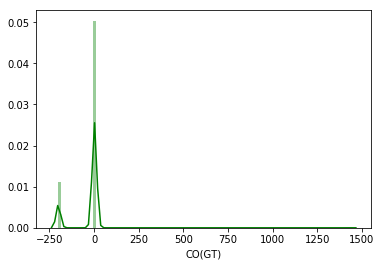

In [55]:
import seaborn as sns
sns.distplot(data["CO(GT)"],color='g', bins=100, hist_kws={'alpha': 0.4});

In [11]:
list(set(data.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [12]:
data1 = data.select_dtypes(include = ['float64', 'int64'])

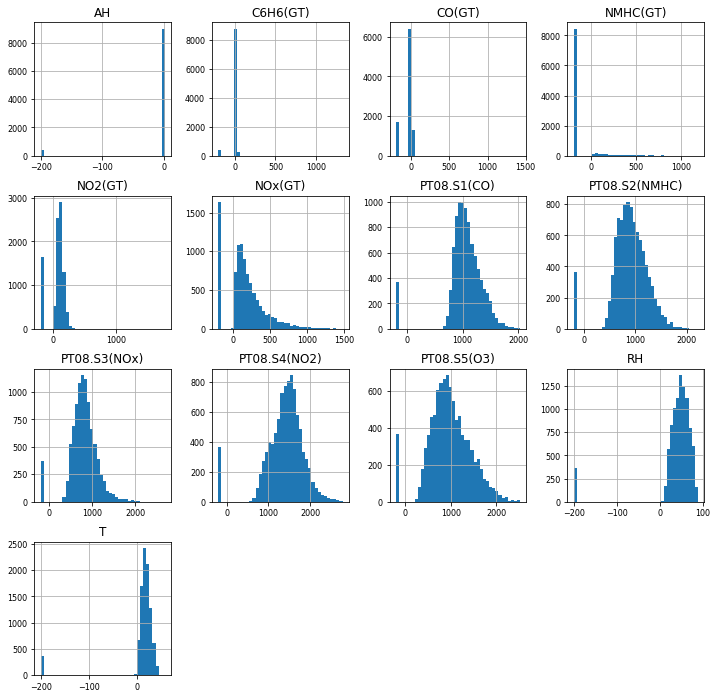

In [13]:
data1.hist(figsize=(12, 12),bins=40, xlabelsize=8, ylabelsize=8);

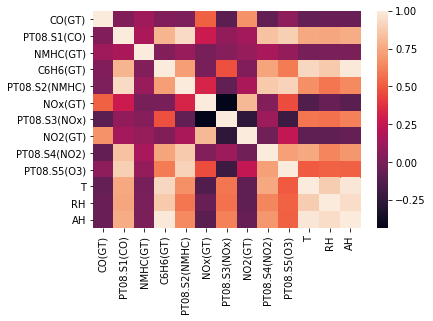

In [14]:
sns.heatmap(data.corr())

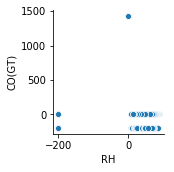

In [15]:
sns.pairplot(data=data1,x_vars=['RH'],y_vars=['CO(GT)'])

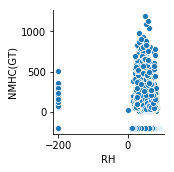

In [16]:
sns.pairplot(data=data1,x_vars=['RH'],y_vars=['NMHC(GT)'])

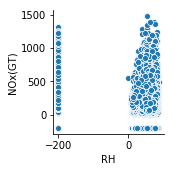

In [56]:
sns.pairplot(data=data1,x_vars=['RH'],y_vars=['NOx(GT)'])

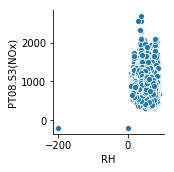

In [57]:
sns.pairplot(data=data1,x_vars=['RH'],y_vars=['PT08.S3(NOx)'])

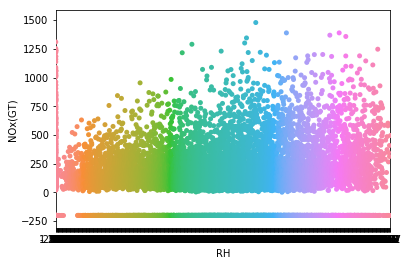

In [68]:
sns.stripplot(x="RH", y="NOx(GT)", data=data, jitter = True)

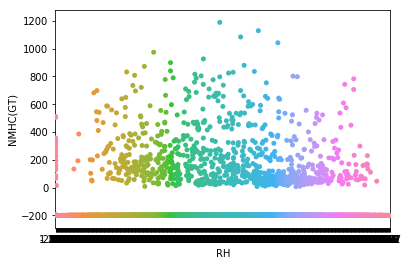

In [70]:
sns.stripplot(x="RH", y="NMHC(GT)", data=data, jitter = True)

# Hypothesis Testing

# T TEST

In [22]:
from scipy.stats import ttest_1samp
import numpy as np

rh_val=data['RH']
rh_mean = np.mean(rh_val)
print(rh_mean)
tset, rhval = ttest_1samp(ages, 39)
print("rh values for 39 age",rhval)
if rhval < 0.05:    
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

39.47939666559795
rh values for 39 age 0.36527046245944206
we are accepting null hypothesis


# CHISQUARE


In [31]:
import pandas as pd
import researchpy as rp
from scipy import stats

In [30]:
crosstab = pd.crosstab(data['Date'], data['AH'])
stats.chi2_contingency(crosstab)

(2630517.005452602,
 4.347597005690324e-27,
 2605980,
 array([[0.93886276, 0.0025652 , 0.0025652 , ..., 0.0025652 , 0.0025652 ,
         0.0025652 ],
        [0.93886276, 0.0025652 , 0.0025652 , ..., 0.0025652 , 0.0025652 ,
         0.0025652 ],
        [0.93886276, 0.0025652 , 0.0025652 , ..., 0.0025652 , 0.0025652 ,
         0.0025652 ],
        ...,
        [0.93886276, 0.0025652 , 0.0025652 , ..., 0.0025652 , 0.0025652 ,
         0.0025652 ],
        [0.93886276, 0.0025652 , 0.0025652 , ..., 0.0025652 , 0.0025652 ,
         0.0025652 ],
        [0.93886276, 0.0025652 , 0.0025652 , ..., 0.0025652 , 0.0025652 ,
         0.0025652 ]]))

In [33]:
table, results = rp.crosstab(data['Date'], data['RH'], prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 294060.0) =,314883.0843
1,p-value =,0.0000
2,Cramer's V =,0.2937


# MODEL

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [84]:
col_=data.columns.tolist()[2:]
X=data[col_].drop('RH',1)
y=data['RH']

In [85]:
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

c:\users\milan\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\milan\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [86]:
dt_one_reg=DecisionTreeRegressor()
dt_model=dt_one_reg.fit(X_train,y_train)
y_pred_dtone=dt_model.predict(X_test)

In [114]:
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV,ShuffleSplit
from sklearn.metrics import make_scorer,r2_score



In [110]:
dtr = DecisionTreeRegressor(random_state=42)
param_grid = {
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }
grid_search = GridSearchCV(dtr,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 10, 20], 'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [None, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [111]:
print(grid_search.best_score_)

0.9969478560884777
